In [21]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [3]:
rs = 123 
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = rs)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

In [6]:
n_estimators=5
random_state=0

In [7]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)

In [8]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0])

In [9]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [10]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9473684210526315,
 'recall': 0.9047619047619048,
 'precision': 0.95,
 'f1score': 0.926829268292683}

In [11]:
model.estimator_

DecisionTreeClassifier(max_depth=1)

In [12]:
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315)]

In [14]:
n_estimators=100
random_state=0

In [15]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9523809523809523,
 'precision': 0.975609756097561,
 'f1score': 0.963855421686747}

In [17]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [18]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1]):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n for n in range(1,100)]
    
    times=20
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = AdaBoostClassifier(n_estimators=n_estimators+1,random_state=0,learning_rate=lr)


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,n_estimators-1]=Accuracy['train Accuracy']
                test_acc[n,j,n_estimators-1]=Accuracy['test Accuracy']




    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.set_xlabel('No of estimators')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    plt.show()

100%|██████████| 20/20 [04:26<00:00, 13.34s/it]


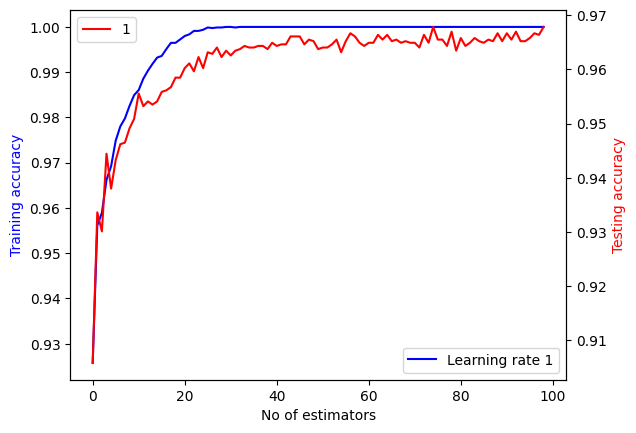

In [22]:
get_accuracy_bag(x,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[1],times=20,xlabel='Number Estimators')

In [23]:
base_estimator=SVC(kernel='rbf',gamma=1)

In [24]:
base_estimator.fit(X_train, y_train)
y_pred = base_estimator.predict(X_test)
evaluate_metrics(y_test, y_pred)


{'accuracy': 0.6403508771929824,
 'recall': 0.023809523809523808,
 'precision': 1.0,
 'f1score': 0.046511627906976744}